
## General Fashion Sentiment Analysis
This model measures sentiment analysis on top subreddits related to fashion.

In [ ]:
#Install PRAW, a Python library for scrapping Reddit

! pip install praw

     |████████████████████████████████| 176 kB 8.7 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 


In [ ]:
#install other libraries for performing analysis

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import praw

In [ ]:
user_agent = 'Digital Fashion Scraper 1.0 by /u/BeautifulEnough9907'
reddit = praw.Reddit(
    client_id='JRczjCRsWmR3odTjccaE8Q',
    client_secret='qJDs55HYI65Kci7707yBFPR3QhppXw',
    user_agent=user_agent,
    check_for_async=False
)

In [ ]:
#list of subreddits

fashion = reddit.subreddit('fashion')
female_fashion_advice = reddit.subreddit('femalefashionadvice')
streetwear = reddit.subreddit('streetwear')
fashion_plus = reddit.subreddit('FashionPlus')
frugal_female_fashion = reddit.subreddit('FrugalFemaleFashion')
ethical_fashion = reddit.subreddit('ethicalfashion') #put this into its own colab
fashion_womens_35 = reddit.subreddit('fashionwomens35')

In [ ]:
#grab all the headlines

headlines = set()
for submission in female_fashion_advice.new(limit=None):
  headlines.add(submission.title)
print(len(headlines))

935


In [ ]:
#grab more data and place in csv

posts = []
for post in female_fashion_advice.new(limit=10):
  posts.append([post.title, post.score, post.num_comments, post.selftext, post.created_utc, post.id])
posts = pd.DataFrame(posts, columns=['Title', 'Score', 'Number of Comments', 'Submission Text', 'Date Created', 'ID'])
print(posts)

                                               Title  Score  \
0                           Business casual joggers?      3   
1                       I can’t take myself anywhere      7   
2    Tiny white fibers stuck in fabric of underwear?      0   
3  Where to shop womens wide soled shoes in perso...      4   
4   Interview outfit for college distinction program     11   
5                          Basic Leather Belt — HELP      0   
6                     How to wear a wide brimmed hat     59   
7  Favourite online stores with decent quality an...      6   
8   Stylish non-slip shoes for a restaurant manager?     11   
9    What can I wear over this dress if it’s chilly?      0   

   Number of Comments                                    Submission Text  \
0                   0  Is there such a thing and what closed-toe shoe...   
1                   3  Good morning ladies! I’m desperate to wear lig...   
2                   4  I have Pact’s black, 95% organic cotton underw...   
3 

In [ ]:
#iterating through comments
from praw.models import MoreComments

submission = reddit.submission(id='umgplv')

submission.comments.replace_more(limit=0)

response = []
for comment in submission.comments.list():
  response.append(comment.body)
  print(response)

In [ ]:
#converting UNIX time to readable format

from datetime import datetime

for i in posts['Date Created']:
  datetime.fromtimestamp(i)
  datetime.utcfromtimestamp(i)
  print(i)

1652158915.0
1652157393.0
1652151204.0
1652143666.0
1652138431.0
1652132775.0
1652131744.0
1652130721.0
1652128804.0
1652122961.0


In [ ]:
#Analysing the headlines

df = pd.DataFrame(headlines)
print(df.head())
df.to_csv('headline.csv', header=False, encoding='utf-8', index=False)

                                                   0
0                                 Frat Formal Advice
1  Forest green lace dress - Ideas for warm layer...
2       What heels would go well with this jumpsuit?
3                             Confused about jewelry
4         Everlane tiered mockneck dress alterations


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headlines'] = line
  results.append(pol_score)

print(results[:5])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headlines': 'Frat Formal Advice'}, {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2263, 'headlines': 'Forest green lace dress - Ideas for warm layer to cover up for early spring wedding (guest)'}, {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732, 'headlines': 'What heels would go well with this jumpsuit?'}, {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182, 'headlines': 'Confused about jewelry'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headlines': 'Everlane tiered mockneck dress alterations'}]


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headlines
0,0.000,1.000,0.000,0.0000,Frat Formal Advice
1,0.000,0.888,0.112,0.2263,Forest green lace dress - Ideas for warm layer...
2,0.000,0.769,0.231,0.2732,What heels would go well with this jumpsuit?
3,0.535,0.465,0.000,-0.3182,Confused about jewelry
4,0.000,1.000,0.000,0.0000,Everlane tiered mockneck dress alterations


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headlines,label
0,0.000,1.000,0.000,0.0000,Frat Formal Advice,0
1,0.000,0.888,0.112,0.2263,Forest green lace dress - Ideas for warm layer...,1
2,0.000,0.769,0.231,0.2732,What heels would go well with this jumpsuit?,1
3,0.535,0.465,0.000,-0.3182,Confused about jewelry,-1
4,0.000,1.000,0.000,0.0000,Everlane tiered mockneck dress alterations,0


In [ ]:
#How many of each classification of comment (0=neutral, 1=positive, -1=negative)
df.label.value_counts()

 0    628
 1    238
-1     69
Name: label, dtype: int64

In [ ]:
#same data as previous cell, just in percentage form

df.label.value_counts(normalize=True) * 100

 0    67.165775
 1    25.454545
-1     7.379679
Name: label, dtype: float64

In [ ]:
#Let's see a few examples

print('Positive:\n')
print(list(df[df['label'] == 1].headlines)[:5])

print('Negative:\n')
print(list(df[df['label'] == -1].headlines)[:5])


Positive:

['Forest green lace dress - Ideas for warm layer to cover up for early spring wedding (guest)', 'What heels would go well with this jumpsuit?', 'Ok I have the opposite issue of the waist gap problem... help?!', 'Bunion friendly stylish shoes/sandals/boots', 'Which backpack is better to use for university?']
Negative:

['Confused about jewelry', 'Panty seams ALWAYS cut into area where my legs meet my torso. Rubs them raw.', 'How do I get over my fear of dressing "too young" for my age?', 'Mid sized beach fashion for someone who hates summer clothes', 'What is fast fashion? Can it realistically be avoided?']


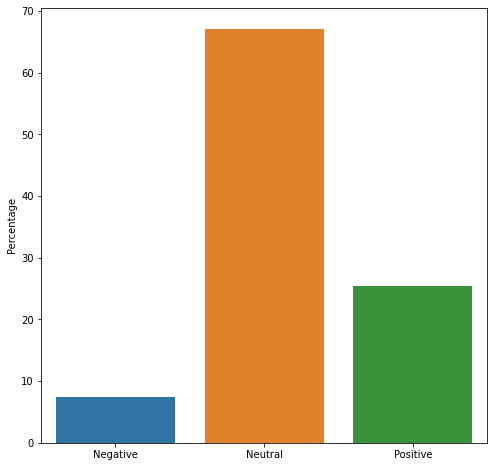

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()